Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Delivery time

In [103]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
# importing dataset
time=pd.read_csv('delivery_time.csv')
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [73]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [74]:
time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

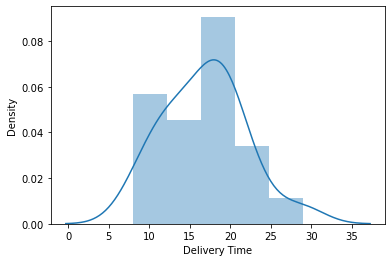

In [75]:
sns.distplot(time['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

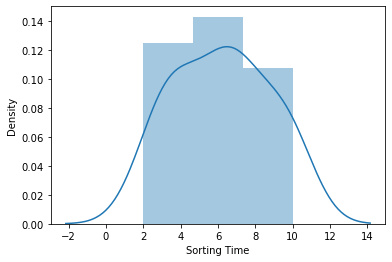

In [76]:
sns.distplot(time['Sorting Time'])

# Feature Engineering

In [77]:
# Renaming Columns using Distionary method
time=time.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [9]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


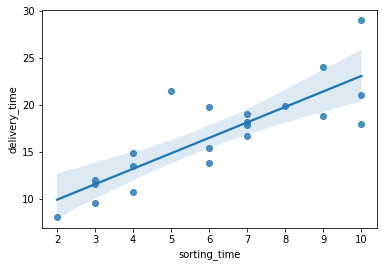

In [79]:
sns.regplot(x=time['sorting_time'],y=time['delivery_time'])
model1=smf.ols("delivery_time~sorting_time",data=time).fit()
model1

# Model Building

In [80]:
newdata1=pd.Series([12,13,14,15,16,17])

In [81]:
data_pred1=pd.DataFrame(newdata1,columns=['sorting_time'])

In [82]:
data_pred1

,sorting_time
0,12
1,13
2,14
3,15
4,16
5,17


In [83]:
model1.predict(data_pred1)

0    26.370973
1    28.019993
2    29.669013
3    31.318032
4    32.967052
5    34.616072
dtype: float64

In [84]:
model1.predict(time)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        22:13:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
pred=model1.predict(time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [88]:
model1.resid
model1.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [89]:
RMSE=np.sqrt(np.mean((np.array(time['sorting_time'])-np.array(pred))**2))
RMSE

10.722052392104557

In [90]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=time).fit()

In [91]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        22:14:36   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
RMSE_log=np.sqrt(np.mean((np.array(time['sorting_time'])-np.array(pred))**2))
RMSE_log

10.722052392104557

In [94]:
model2=smf.ols("np.log(delivery_time)~sorting_time",data=time).fit()

In [95]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 22 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                           22:17:21   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
RMSE_log=np.sqrt(np.mean((np.array(time['sorting_time'])-np.array(pred))**2))
RMSE_log

10.722052392104557

In [97]:
model3=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=time).fit()

In [98]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 22 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           22:17:46   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
actual=time.delivery_time
pred=model3.predict(time)
residual=actual-pred

In [100]:
pred

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [101]:
Newdata=pd.DataFrame({"sorting_time":10.00},index=[1])

In [102]:
model3.predict(Newdata)

1    3.117833
dtype: float64

In [106]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [107]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(4, 0.46205304126503155)

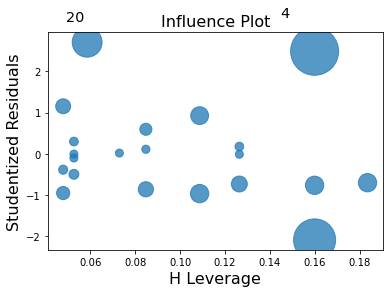

In [108]:
influence_plot(model)
plt.show()

In [109]:
k = time.shape[1]
n = time.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [110]:
time[time.index.isin([7,18])]

,delivery_time,sorting_time
7,9.5,3
18,8.0,2


In [111]:
time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


IMPROVING MODEL

In [112]:
time_new=pd.read_csv("delivery_time.csv")

In [119]:
#Discard the data points which are influencers and reasign the row number (reset_index())
time1=time_new.drop(time_new.index[[7,18]],axis=0).reset_index()

In [120]:
#Drop the original index
time1=time1.drop(['index'],axis=1)

In [121]:
time1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,17.90,10
8,18.75,9
9,19.83,8


In [122]:
time1=time1.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

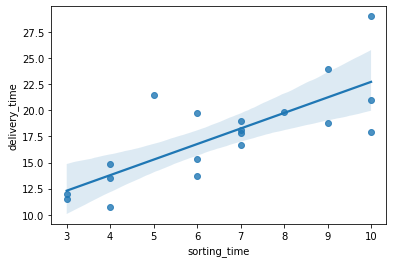

In [123]:
sns.regplot(x=time1['sorting_time'],y=time1['delivery_time'],data=time1)
model4=smf.ols("delivery_time~sorting_time",data=time1).fit()
model4

In [124]:
newdata2=pd.Series([12,13,14,15])

In [125]:
data_pred2=pd.DataFrame(newdata2,columns=['sorting_time'])

In [127]:
data_pred2

,sorting_time
0,12
1,13
2,14
3,15


In [128]:
model4.predict(time1)

0     22.728074
1     13.799760
2     16.775864
3     21.240021
4     22.728074
5     16.775864
6     18.263917
7     22.728074
8     21.240021
9     19.751969
10    13.799760
11    18.263917
12    12.311708
13    12.311708
14    13.799760
15    16.775864
16    18.263917
17    18.263917
18    15.287812
dtype: float64

# Salary hike

In [20]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [22]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

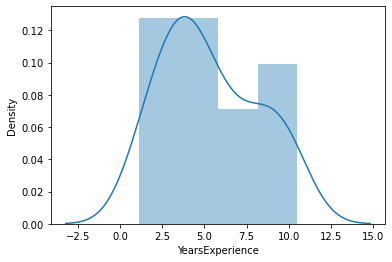

In [23]:
sns.distplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

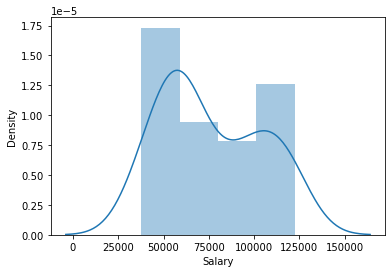

In [24]:
sns.distplot(dataset['Salary'])

# Correlation Analysis

In [25]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

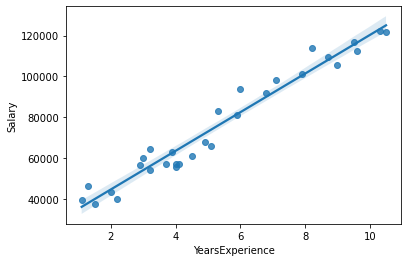

In [26]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

# Model Building

In [27]:
newdata=pd.Series([11,11.5,12,12.5,13,13.5])

In [28]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [29]:
data_pred

,YearsExperience
0,11.0
1,11.5
2,12.0
3,12.5
4,13.0
5,13.5


In [30]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

# Model Predictions

In [31]:
model.predict(data_pred)

0    129741.785735
1    134466.766895
2    139191.748056
3    143916.729217
4    148641.710378
5    153366.691538
dtype: float64

In [53]:
model.predict(dataset)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        21:53:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
pred=model.predict(dataset.iloc[:,0])

In [56]:
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [57]:
model.resid 
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [60]:
RMSE=np.sqrt(np.mean((np.array(dataset['YearsExperience'])-np.array(pred))**2))
RMSE

80440.84508275456

Text(0, 0.5, 'Salary')

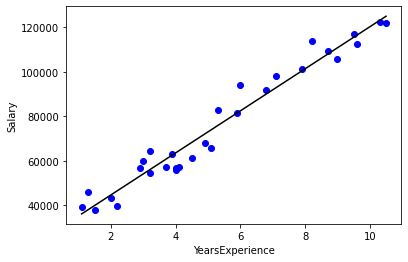

In [47]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='blue')
plt.plot(dataset.YearsExperience, pred,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [61]:
df_new=pd.DataFrame({"YearsExperience":10},index=[1])

In [62]:
model.predict(df_new)

1    120291.823413
dtype: float64

# Model Testing

In [33]:
model1 = smf.ols("Salary~np.log(YearsExperience)",data=dataset).fit()

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        21:53:31   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model2 = smf.ols("Salary~np.exp(YearsExperience)",data=dataset).fit()

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.72e-05
Time:                        21:53:31   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
pred1=model1.predict(dataset)

Text(0, 0.5, 'Salary')

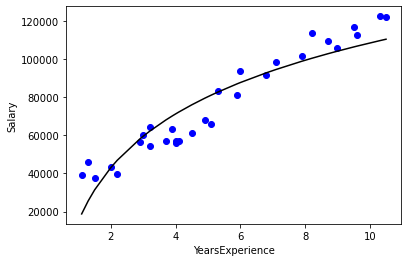

In [49]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='blue')
plt.plot(dataset.YearsExperience, pred1,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [50]:
pred2=model2.predict(dataset)

Text(0, 0.5, 'Salary')

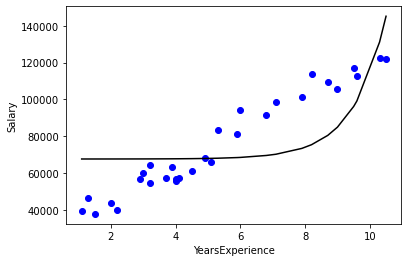

In [51]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='blue')
plt.plot(dataset.YearsExperience, pred2,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [37]:
# Finding Co-efficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [38]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [39]:
model2.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [40]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [41]:
model1.tvalues, model1.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [42]:
model2.tvalues, model2.pvalues

(Intercept                  16.620427
 np.exp(YearsExperience)     5.006889
 dtype: float64,
 Intercept                  4.888835e-16
 np.exp(YearsExperience)    2.721588e-05
 dtype: float64)

In [43]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [44]:
model1.rsquared , model1.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [45]:
model2.rsquared , model2.rsquared_adj

(0.47238440560728734, 0.45354099152183325)